In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

print(os.getcwd())
spaceship_titanic_path = kagglehub.competition_download('spaceship-titanic')
print(spaceship_titanic_path)

source_dir = spaceship_titanic_path
destination_dir = '../kaggle/'

for file_name in os.listdir(source_dir):
    file_path = os.path.join(source_dir, file_name)  # Full file path
    if os.path.isfile(file_path):  # Check if it's a file
        shutil.move(file_path, destination_dir)

print('Data source import complete.')


/content


100%|██████████| 299k/299k [00:00<00:00, 57.5MB/s]

Extracting files...
/root/.cache/kagglehub/competitions/spaceship-titanic
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../kaggle/sample_submission.csv
../kaggle/train.csv
../kaggle/test.csv


In [251]:
train_data = pd.read_csv('../kaggle/train.csv')

In [252]:
test_data = pd.read_csv('../kaggle/test.csv')

In [253]:
train_data.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [254]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [255]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [256]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
train_data['CryoSleep'] = [0 if i == 0 else 1 if i == 1 else np.nan for i in train_data['CryoSleep']]

In [259]:
train_data['VIP'] = [0 if i == 0 else 1 if i == 1 else np.nan for i in train_data['VIP']]

In [260]:
train_data['Transported'] = [0 if i == False else 1 for i in train_data['Transported']]

In [261]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


In [262]:
train_data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


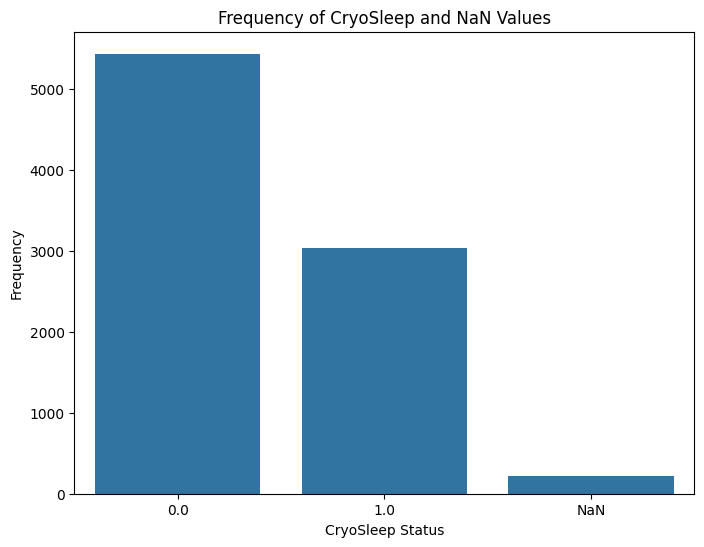

In [263]:
# prompt: create a barplot for cryosleep with its frequency along with frequency of nan values

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is your DataFrame
cryosleep_counts = train_data['CryoSleep'].value_counts()
cryosleep_counts['NaN'] = train_data['CryoSleep'].isnull().sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=cryosleep_counts.index, y=cryosleep_counts.values)
plt.title('Frequency of CryoSleep and NaN Values')
plt.xlabel('CryoSleep Status')
plt.ylabel('Frequency')
plt.show()


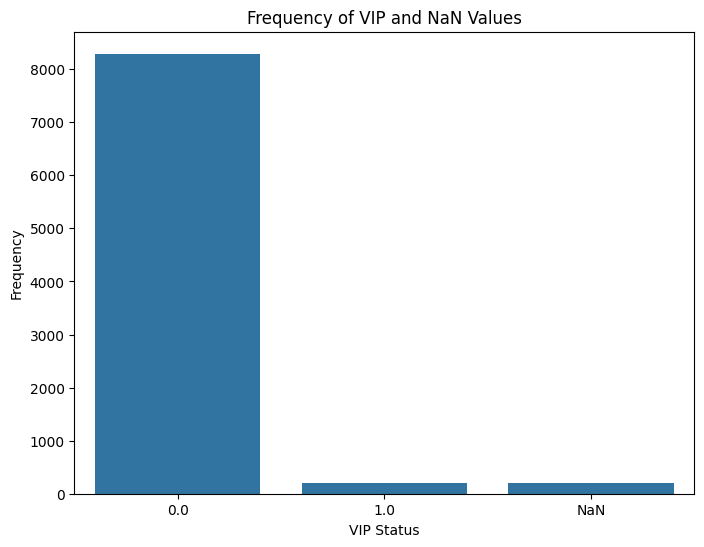

In [264]:
# prompt: create a barplot for vip with its frequency along with frequency of nan values

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
vip_counts = train_data['VIP'].value_counts()
vip_counts['NaN'] = train_data['VIP'].isnull().sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=vip_counts.index, y=vip_counts.values)
plt.title('Frequency of VIP and NaN Values')
plt.xlabel('VIP Status')
plt.ylabel('Frequency')
plt.show()

In [265]:
# Since the frequency of NaN values in the columns is less and the frequency of 0 value in these is very high.
# So, converting the NaN values to 0 would be preferable.

In [266]:
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(0).astype(int)

In [267]:
train_data['VIP'] = train_data['VIP'].fillna(0).astype(int)

In [268]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


In [269]:
train_data[train_data["CryoSleep"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


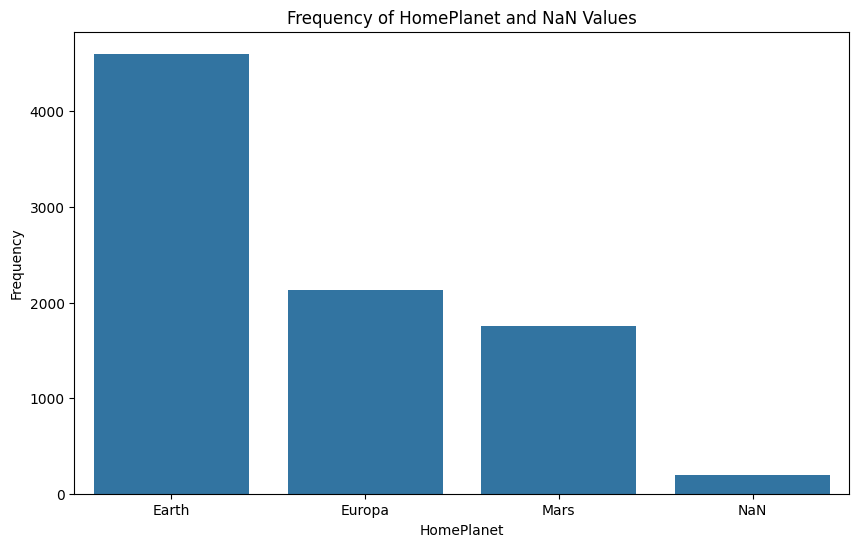

In [270]:
# prompt: create a barplot for homeplanet with its frequency along with frequency of nan values

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
homeplanet_counts = train_data['HomePlanet'].value_counts()
homeplanet_counts['NaN'] = train_data['HomePlanet'].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=homeplanet_counts.index, y=homeplanet_counts.values)
plt.title('Frequency of HomePlanet and NaN Values')
plt.xlabel('HomePlanet')
plt.ylabel('Frequency')
plt.show()



### **Nominal Categories (No Inherent Order):**
If your values (0, 1, 2) don't have a natural ranking, then one-hot encoding (creating separate binary features for each category) is typically better. This avoids implying an ordinal relationship that doesn't exist and usually helps models—especially linear ones or distance-based algorithms—perform better.

---
### **Ordinal Categories (Inherent Order):**
If the categories have a meaningful order (for example, "low," "medium," "high"), then encoding them as 0, 1, 2 might be appropriate because it preserves the natural order.

In [271]:
# Replacing the NaN values with the mode value as categories in the value are very less and vary descretely
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)

<ipython-input-271-cff26fec6c9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)


In [272]:
# Since there is no relationship between the values, Hence we would prefer dummies.

train_data = pd.get_dummies(train_data, columns=['HomePlanet'], prefix=['HomePlanet'])

In [273]:
for i in ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars']:
    train_data[i] = [0 if j == False else 1 for j in train_data[i]]

In [274]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   CryoSleep          8693 non-null   int64  
 2   Cabin              8494 non-null   object 
 3   Destination        8511 non-null   object 
 4   Age                8514 non-null   float64
 5   VIP                8693 non-null   int64  
 6   RoomService        8512 non-null   float64
 7   FoodCourt          8510 non-null   float64
 8   ShoppingMall       8485 non-null   float64
 9   Spa                8510 non-null   float64
 10  VRDeck             8505 non-null   float64
 11  Name               8493 non-null   object 
 12  Transported        8693 non-null   int64  
 13  HomePlanet_Earth   8693 non-null   int64  
 14  HomePlanet_Europa  8693 non-null   int64  
 15  HomePlanet_Mars    8693 non-null   int64  
dtypes: float64(6), int64(6),

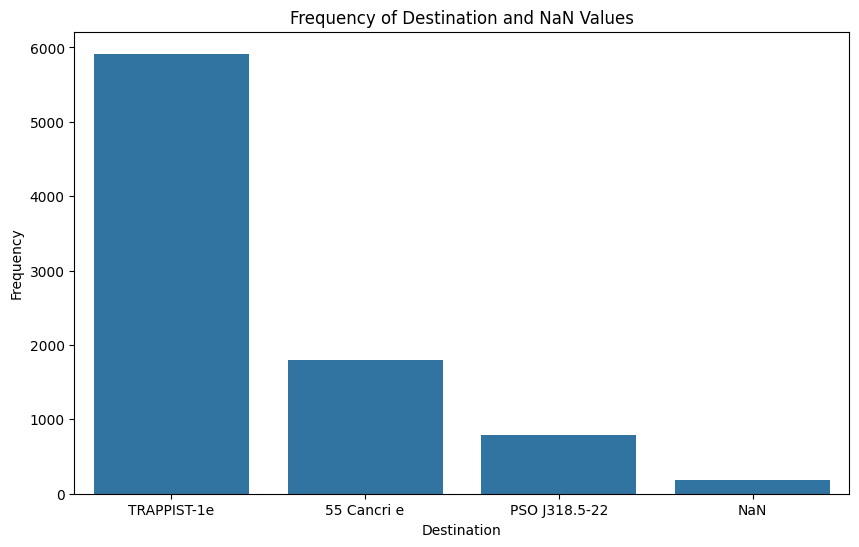

In [275]:
# prompt: create a barplot for destination with its frequency along with frequency of nan values

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
destination_counts = train_data['Destination'].value_counts()
destination_counts['NaN'] = train_data['Destination'].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Frequency of Destination and NaN Values')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.show()


In [276]:
train_data['Destination'].fillna("TRAPPIST-1e", inplace = True)

<ipython-input-276-51d68593752e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Destination'].fillna("TRAPPIST-1e", inplace = True)


In [277]:

train_data = pd.get_dummies(train_data, columns=['Destination'], prefix=['Destination'])

In [278]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8512 non-null   float64
 6   FoodCourt                  8510 non-null   float64
 7   ShoppingMall               8485 non-null   float64
 8   Spa                        8510 non-null   float64
 9   VRDeck                     8505 non-null   float64
 10  Name                       8493 non-null   object 
 11  Transported                8693 non-null   int64  
 12  HomePlanet_Earth           8693 non-null   int64  
 13  HomePlanet_Europa          8693 non-null   int64

In [279]:
for i in ['Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']:
    train_data[i] = [0 if j == False else 1 for j in train_data[i]]

In [280]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8512 non-null   float64
 6   FoodCourt                  8510 non-null   float64
 7   ShoppingMall               8485 non-null   float64
 8   Spa                        8510 non-null   float64
 9   VRDeck                     8505 non-null   float64
 10  Name                       8493 non-null   object 
 11  Transported                8693 non-null   int64  
 12  HomePlanet_Earth           8693 non-null   int64  
 13  HomePlanet_Europa          8693 non-null   int64

In [281]:
# prompt: find the frequency of transported as 1 for cabins and sort it in descending order

# Group by 'Cabin' and calculate the frequency of 'Transported' as 1
cabin_transported_freq = train_data.groupby('Cabin')['Transported'].sum()

# Sort in descending order
cabin_transported_freq_sorted = cabin_transported_freq.sort_values(ascending=False)

cabin_transported_freq_sorted


,Transported
Cabin,
G/981/S,7
C/230/S,6
C/137/S,6
G/765/S,6
B/82/S,6
...,...
F/1872/P,0
F/1871/P,0
F/1870/P,0


In [282]:
# prompt: divide the cabin col into 3 seperate cols named deck, num, side

# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
train_data.drop(columns=['Cabin'], inplace=True)
# Print the updated DataFrame to verify the changes
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Age                        8514 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8512 non-null   float64
 5   FoodCourt                  8510 non-null   float64
 6   ShoppingMall               8485 non-null   float64
 7   Spa                        8510 non-null   float64
 8   VRDeck                     8505 non-null   float64
 9   Name                       8493 non-null   object 
 10  Transported                8693 non-null   int64  
 11  HomePlanet_Earth           8693 non-null   int64  
 12  HomePlanet_Europa          8693 non-null   int64  
 13  HomePlanet_Mars            8693 non-null   int64

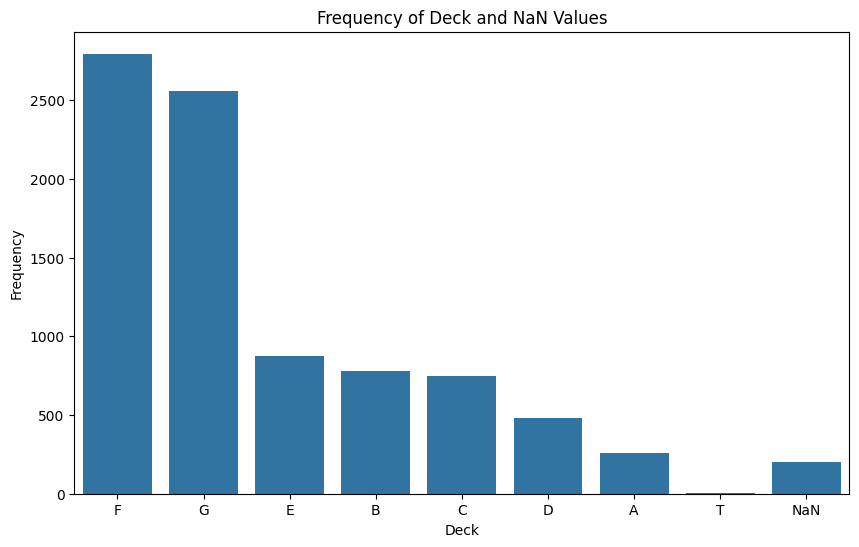

In [283]:
# prompt: plot the bargraph with frequency of transported as 1 and deck along with its nan values

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
deck_counts = train_data['Deck'].value_counts()
deck_counts['NaN'] = train_data['Deck'].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=deck_counts.index, y=deck_counts.values)
plt.title('Frequency of Deck and NaN Values')
plt.xlabel('Deck')
plt.ylabel('Frequency')
plt.show()


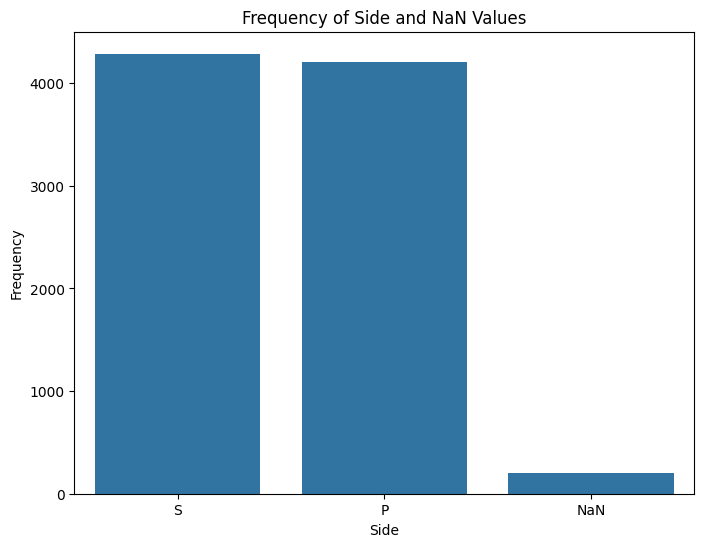

In [284]:
# prompt: plot the bargraph with frequency of transported as 1 and side along with its nan values

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
side_counts = train_data['Side'].value_counts()
side_counts['NaN'] = train_data['Side'].isnull().sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=side_counts.index, y=side_counts.values)
plt.title('Frequency of Side and NaN Values')
plt.xlabel('Side')
plt.ylabel('Frequency')
plt.show()

<ipython-input-285-7bed76637655>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deck_side_transported_freq['Deck'].fillna('Unknown', inplace=True)
<ipython-input-285-7bed76637655>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

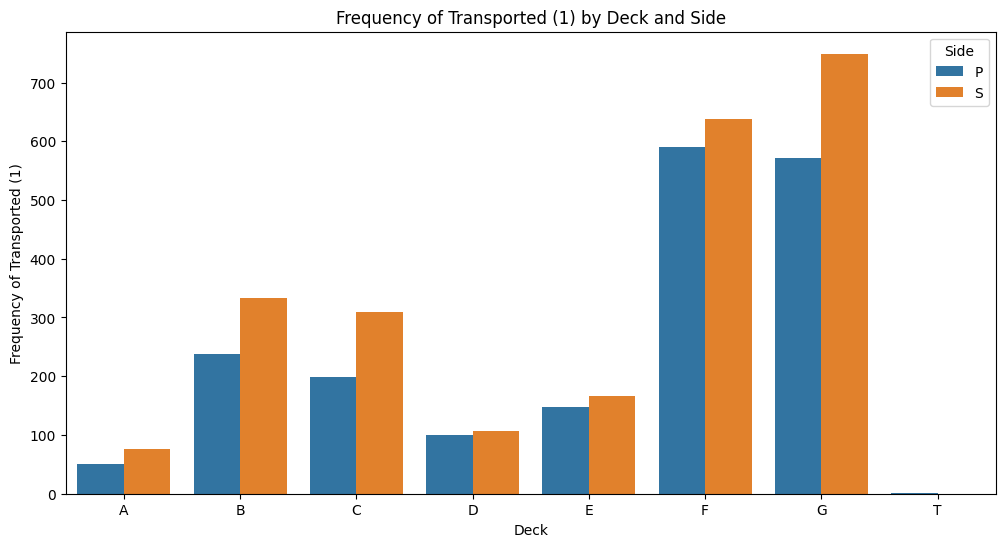

In [285]:
# prompt: plot the bargraph with frequency of transported as 1 and deck along with its nan values and side along with its nan values

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and 'Side' and calculate the frequency of 'Transported' as 1
deck_side_transported_freq = train_data.groupby(['Deck', 'Side'])['Transported'].sum()

# Reset the index to create columns for 'Deck' and 'Side'
deck_side_transported_freq = deck_side_transported_freq.reset_index()

# Replace NaN values in 'Deck' and 'Side' with 'Unknown'
deck_side_transported_freq['Deck'].fillna('Unknown', inplace=True)
deck_side_transported_freq['Side'].fillna('Unknown', inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Deck', y='Transported', hue='Side', data=deck_side_transported_freq)
plt.title('Frequency of Transported (1) by Deck and Side')
plt.xlabel('Deck')
plt.ylabel('Frequency of Transported (1)')
plt.legend(title='Side')
plt.show()


In [286]:
# prompt: generate frequency of transported as 1 and deck along with its nan values and side along with its nan values in descending order of frequency

# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and 'Side' and calculate the frequency of 'Transported' as 1
deck_side_transported_freq = train_data.groupby(['Deck', 'Side'])['Transported'].sum()

# Sort the values in descending order of frequency
deck_side_transported_freq_sorted = deck_side_transported_freq.sort_values(ascending=False)

# Print the sorted frequencies
deck_side_transported_freq_sorted


Deck  Side
G     S       749
F     S       638
      P       591
G     P       572
B     S       334
C     S       310
B     P       238
C     P       198
E     S       166
      P       147
D     S       107
      P       100
A     S        76
      P        51
T     P         1
      S         0
Name: Transported, dtype: int64

In [287]:
# prompt: calculate the percentage of first 4 entries of deck_side_transported_freq_sorted with respect to the total sum of these 4 entries.

# Get the first 4 entries of the sorted series
first_four_entries = deck_side_transported_freq_sorted[:4]

# Calculate the total sum of these 4 entries
total_sum = first_four_entries.sum()

# Calculate the percentage of each entry with respect to the total sum
percentage_list = [(value / total_sum) * 100 for value in first_four_entries.values]

# Print the percentages
percentage_list


[np.float64(29.372549019607842),
 np.float64(25.019607843137255),
 np.float64(23.176470588235293),
 np.float64(22.431372549019606)]

In [288]:
# prompt: replace percentage_list[0]% of nan values in deck and side to first_four_entries[0] and so on respectively

# Assuming 'train_data' is your DataFrame and 'percentage_list' and 'first_four_entries' are defined as in your code

for i, (deck_side, _) in enumerate(first_four_entries.items()):
  deck, side = deck_side
  nan_count = train_data[(train_data['Deck'].isnull()) & (train_data['Side'].isnull())].shape[0]
  num_to_replace = int(nan_count * (percentage_list[i] / 100))

  # Replace NaN values in 'Deck' and 'Side' with the corresponding values from 'first_four_entries'
  train_data.loc[(train_data['Deck'].isnull()) & (train_data['Side'].isnull()), ['Deck', 'Side']] = \
      train_data[(train_data['Deck'].isnull()) & (train_data['Side'].isnull())][['Deck', 'Side']].fillna(
          {'Deck': deck, 'Side': side}, limit=num_to_replace
      )



<ipython-input-289-7bed76637655>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deck_side_transported_freq['Deck'].fillna('Unknown', inplace=True)
<ipython-input-289-7bed76637655>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

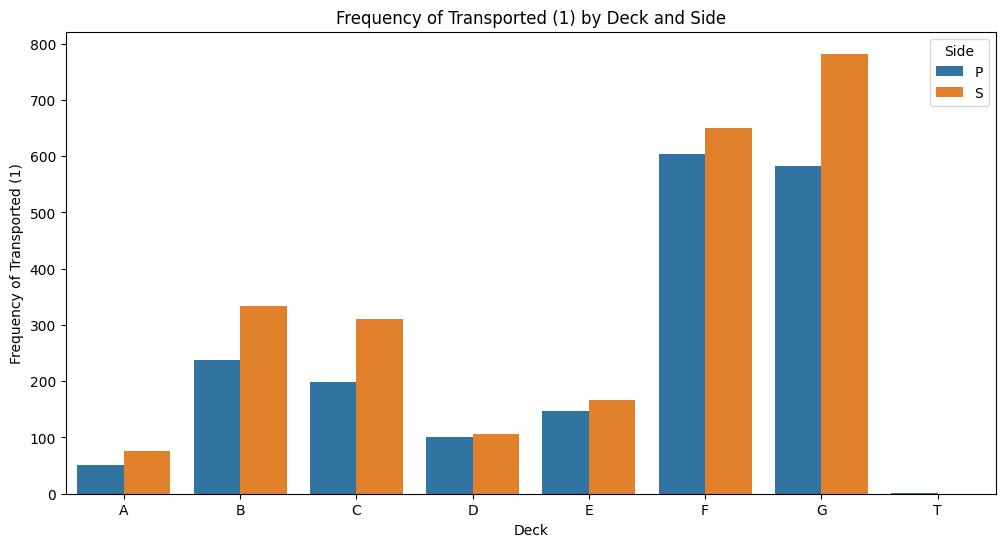

In [289]:
# prompt: plot the bargraph with frequency of transported as 1 and deck along with its nan values and side along with its nan values

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and 'Side' and calculate the frequency of 'Transported' as 1
deck_side_transported_freq = train_data.groupby(['Deck', 'Side'])['Transported'].sum()

# Reset the index to create columns for 'Deck' and 'Side'
deck_side_transported_freq = deck_side_transported_freq.reset_index()

# Replace NaN values in 'Deck' and 'Side' with 'Unknown'
deck_side_transported_freq['Deck'].fillna('Unknown', inplace=True)
deck_side_transported_freq['Side'].fillna('Unknown', inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Deck', y='Transported', hue='Side', data=deck_side_transported_freq)
plt.title('Frequency of Transported (1) by Deck and Side')
plt.xlabel('Deck')
plt.ylabel('Frequency of Transported (1)')
plt.legend(title='Side')
plt.show()


In [290]:
# prompt: generate frequency of transported as 1 and deck along with its nan values and side along with its nan values in descending order of frequency

# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and 'Side' and calculate the frequency of 'Transported' as 1
deck_side_transported_freq = train_data.groupby(['Deck', 'Side'])['Transported'].sum()

# Sort the values in descending order of frequency
deck_side_transported_freq_sorted = deck_side_transported_freq.sort_values(ascending=False)

# Print the sorted frequencies
deck_side_transported_freq_sorted


Deck  Side
G     S       782
F     S       650
      P       604
G     P       583
B     S       334
C     S       310
B     P       238
C     P       198
E     S       166
      P       147
D     S       107
      P       100
A     S        76
      P        51
T     P         1
      S         0
Name: Transported, dtype: int64

In [291]:
# prompt: replace the deck and side cols in train_data with the above data

import pandas as pd
# Assuming 'deck_side_transported_freq_sorted' contains the sorted frequencies of 'Deck' and 'Side'

# Create a dictionary to map the most frequent Deck and Side combinations to NaN values
deck_side_mapping = {
    (deck, side): (deck, side) for (deck, side), _ in deck_side_transported_freq_sorted.items()
}

# Replace NaN values in 'Deck' and 'Side' with the most frequent combinations
for i in range(train_data.shape[0]):
  if pd.isnull(train_data.loc[i, 'Deck']) and pd.isnull(train_data.loc[i, 'Side']):
    # Find the most frequent combination from the mapping
    for (deck, side), (new_deck, new_side) in deck_side_mapping.items():
        train_data.loc[i, 'Deck'] = new_deck
        train_data.loc[i, 'Side'] = new_side
        break  # Assign only one combination

# Now, 'train_data' has NaN values in 'Deck' and 'Side' replaced with the most frequent combinations.


In [292]:
# prompt: generate frequency of transported as 1 and deck along with its nan values and side along with its nan values in descending order of frequency

# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and 'Side' and calculate the frequency of 'Transported' as 1
deck_side_transported_freq = train_data.groupby(['Deck', 'Side'])['Transported'].sum()

# Sort the values in descending order of frequency
deck_side_transported_freq_sorted = deck_side_transported_freq.sort_values(ascending=False)

# Print the sorted frequencies along with NaN values for Deck and Side
print(deck_side_transported_freq_sorted)


# Assuming 'train_data' is your DataFrame

# Group by 'Deck' and calculate the frequency of 'Transported' as 1, including NaN values
deck_transported_freq = train_data.groupby('Deck')['Transported'].agg(['sum', 'count'])
deck_transported_freq['NaN_count'] = train_data['Deck'].isnull().sum()


# Sort in descending order of frequency
deck_transported_freq_sorted = deck_transported_freq.sort_values(by='sum', ascending=False)
print(deck_transported_freq_sorted)

# Group by 'Side' and calculate the frequency of 'Transported' as 1, including NaN values
side_transported_freq = train_data.groupby('Side')['Transported'].agg(['sum', 'count'])
side_transported_freq['NaN_count'] = train_data['Side'].isnull().sum()


# Sort in descending order of frequency
side_transported_freq_sorted = side_transported_freq.sort_values(by='sum', ascending=False)
side_transported_freq_sorted


Deck  Side
G     S       813
F     S       650
      P       604
G     P       583
B     S       334
C     S       310
B     P       238
C     P       198
E     S       166
      P       147
D     S       107
      P       100
A     S        76
      P        51
T     P         1
      S         0
Name: Transported, dtype: int64
       sum  count  NaN_count
Deck                        
G     1396   2699          0
F     1254   2853          0
B      572    779          0
C      508    747          0
E      313    876          0
D      207    478          0
A      127    256          0
T        1      5          0


,sum,count,NaN_count
Side,,,
S,2456,4445,0
P,1922,4248,0


In [293]:
train_data.drop(['Num', 'Name', 'PassengerId'], axis = 1, inplace = True)

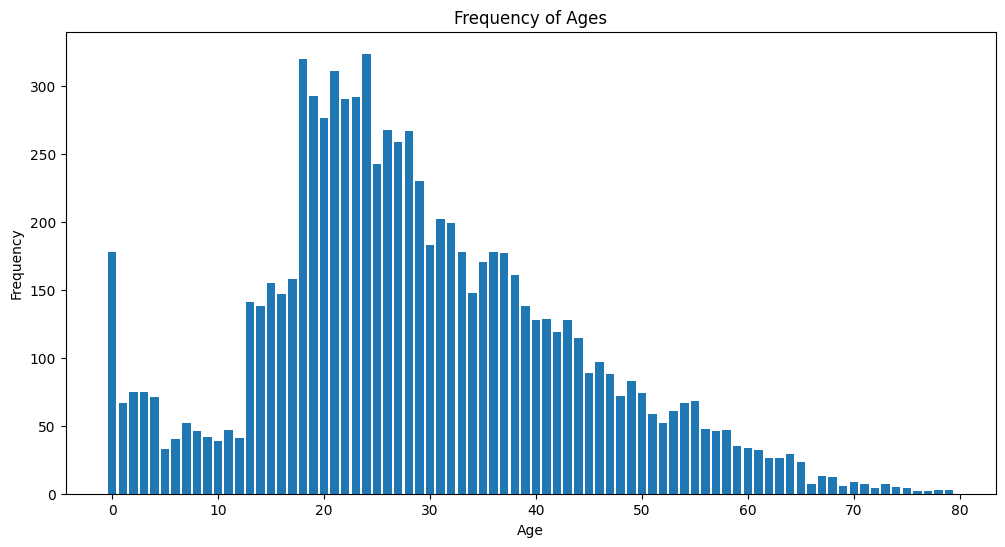

In [294]:
# prompt: plot a bargraph representing frequency of ages

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame and 'Age' is the column containing ages.

# Calculate the frequency of ages
age_counts = train_data['Age'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Ages')
plt.show()


In [295]:
# prompt: provide in descending order of frequency of transported == 1 wrt age along with nan values in age

# Assuming 'train_data' is your DataFrame

# Group by 'Age' and calculate the frequency of 'Transported' as 1, including NaN values
age_transported_freq = train_data.groupby('Age')['Transported'].agg(['count'])
age_transported_freq['NaN_count'] = train_data['Age'].isnull().sum()

# Sort in descending order of frequency of 'Transported' == 1
age_transported_freq_sorted = age_transported_freq.sort_values(by='count', ascending=False)

age_transported_freq_sorted.head(16)


,count,NaN_count
Age,,
24.0,324,179
18.0,320,179
21.0,311,179
19.0,293,179
23.0,292,179
22.0,291,179
20.0,277,179
26.0,268,179
28.0,267,179


In [296]:
# prompt: replace the nan values in age with median

# Replace NaN values in 'Age' with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


<ipython-input-296-f0590e472399>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8512 non-null   float64
 4   FoodCourt                  8510 non-null   float64
 5   ShoppingMall               8485 non-null   float64
 6   Spa                        8510 non-null   float64
 7   VRDeck                     8505 non-null   float64
 8   Transported                8693 non-null   int64  
 9   HomePlanet_Earth           8693 non-null   int64  
 10  HomePlanet_Europa          8693 non-null   int64  
 11  HomePlanet_Mars            8693 non-null   int64  
 12  Destination_55 Cancri e    8693 non-null   int64  
 13  Destination_PSO J318.5-22  8693 non-null   int64

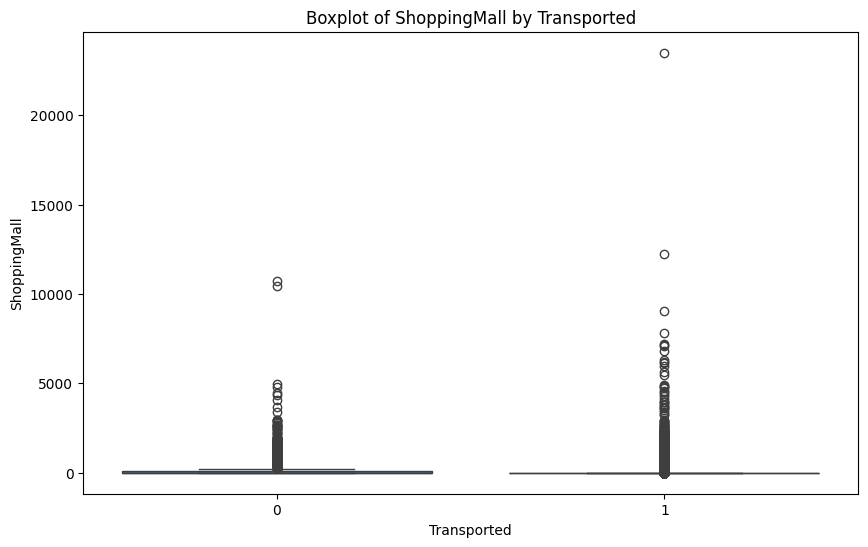

In [298]:
# prompt: plot a boxplot graph for ShoppingMall and transported

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='ShoppingMall', data=train_data)
plt.title('Boxplot of ShoppingMall by Transported')
plt.xlabel('Transported')
plt.ylabel('ShoppingMall')
plt.show()

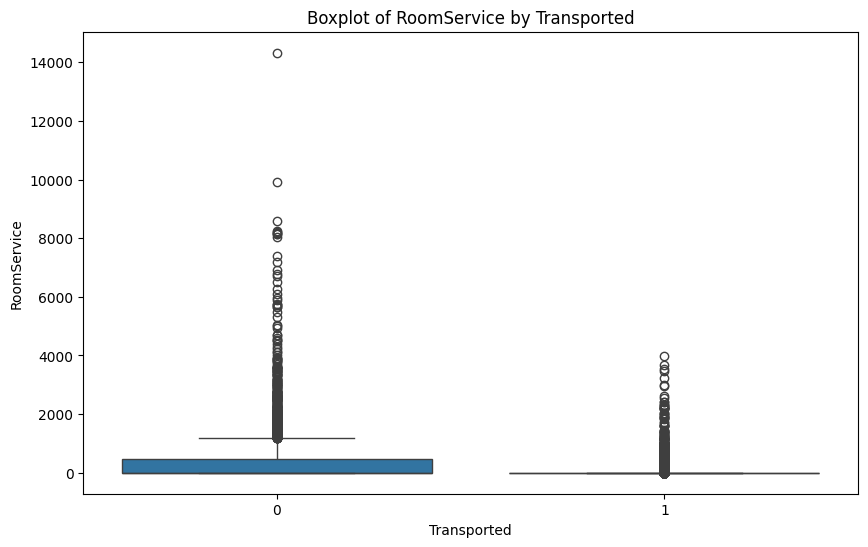

In [299]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='RoomService', data=train_data)
plt.title('Boxplot of RoomService by Transported')
plt.xlabel('Transported')
plt.ylabel('RoomService')
plt.show()

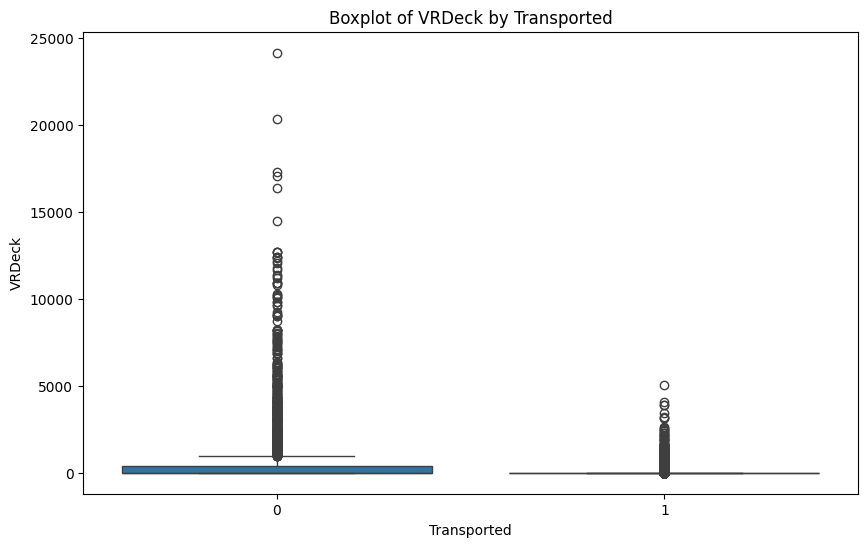

In [300]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='VRDeck', data=train_data)
plt.title('Boxplot of VRDeck by Transported')
plt.xlabel('Transported')
plt.ylabel('VRDeck')
plt.show()

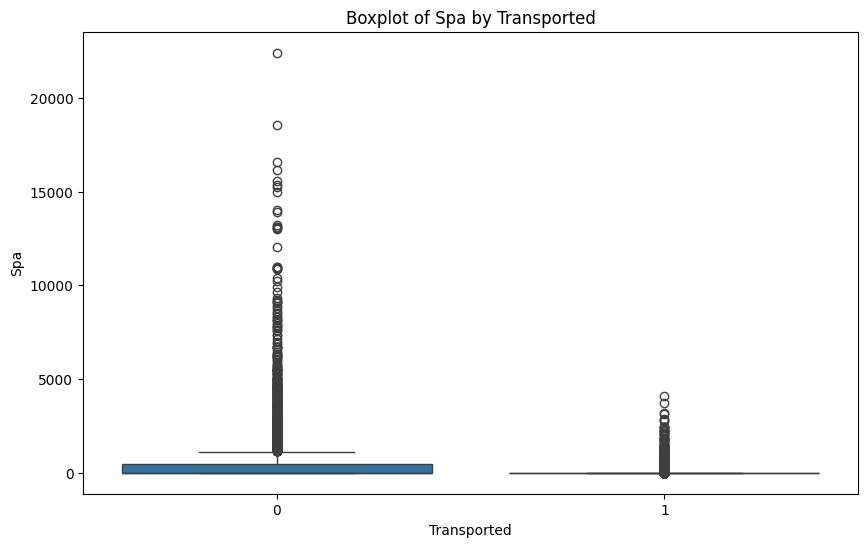

In [301]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Spa', data=train_data)
plt.title('Boxplot of Spa by Transported')
plt.xlabel('Transported')
plt.ylabel('Spa')
plt.show()

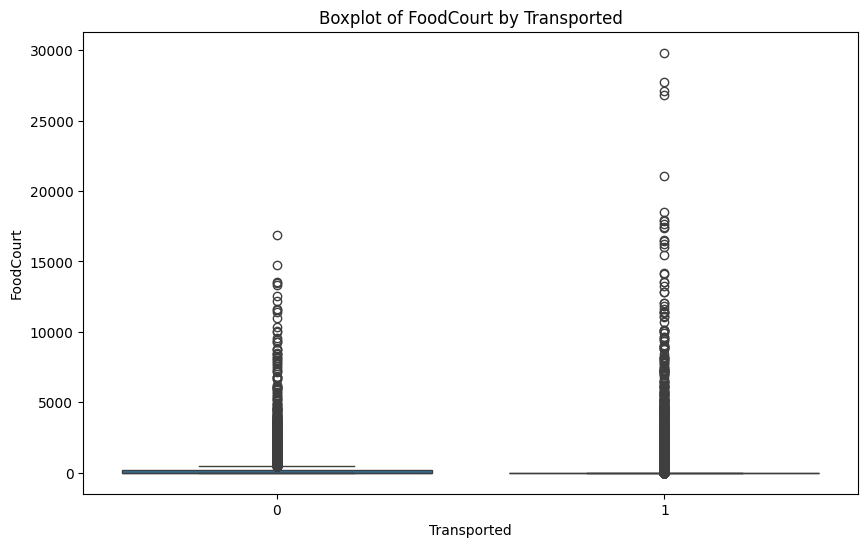

In [302]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='FoodCourt', data=train_data)
plt.title('Boxplot of FoodCourt by Transported')
plt.xlabel('Transported')
plt.ylabel('FoodCourt')
plt.show()

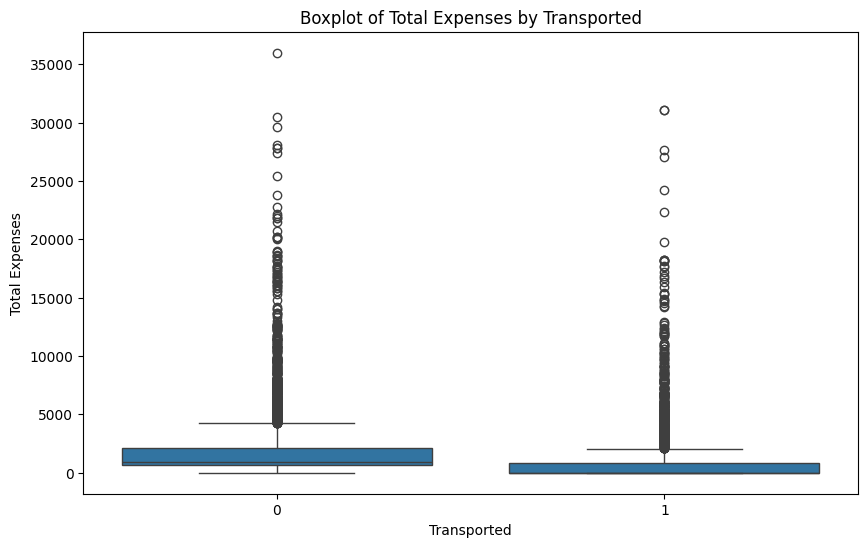

In [303]:
# prompt: plot the boxplot for the sum of spa, foodcourt, roomservice,shoppingmall,vrdeck with transported

import matplotlib.pyplot as plt
# Assuming 'train_data' is your DataFrame
train_data['TotalExpenses'] = train_data['Spa'] + train_data['FoodCourt'] + train_data['RoomService'] + train_data['ShoppingMall'] + train_data['VRDeck']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='TotalExpenses', data=train_data)
plt.title('Boxplot of Total Expenses by Transported')
plt.xlabel('Transported')
plt.ylabel('Total Expenses')
plt.show()


In [308]:
# prompt: add a col in train_data with total expences and replce all the values greather than 15000 or nan with the median value of total expences. Also drop the cols  spa, foodcourt, roomservice,shoppingmall,vrdeck

import numpy as np
# Calculate the median of 'TotalExpenses', excluding NaN values
median_total_expenses = train_data['TotalExpenses'].median()

# Replace values greater than 15000 or NaN with the median
train_data['TotalExpenses'] = np.where(
    (train_data['TotalExpenses'] > 15000) | (train_data['TotalExpenses'].isnull()),
    median_total_expenses,
    train_data['TotalExpenses']
)

# Drop the specified columns
train_data.drop(['Spa', 'FoodCourt', 'RoomService', 'ShoppingMall', 'VRDeck'], axis=1, inplace=True)


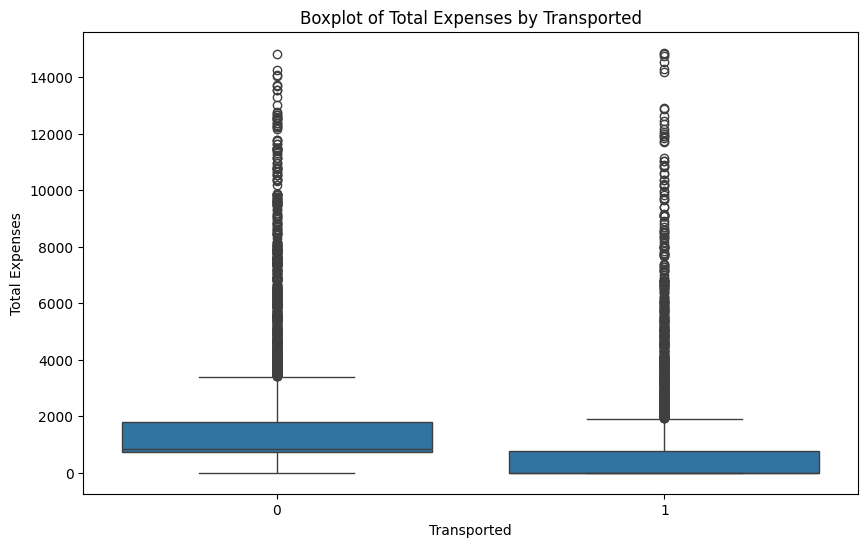

In [309]:
# prompt: plot a boxplot for transported and total expense

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='TotalExpenses', data=train_data)
plt.title('Boxplot of Total Expenses by Transported')
plt.xlabel('Transported')
plt.ylabel('Total Expenses')
plt.show()

In [310]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   Transported                8693 non-null   int64  
 4   HomePlanet_Earth           8693 non-null   int64  
 5   HomePlanet_Europa          8693 non-null   int64  
 6   HomePlanet_Mars            8693 non-null   int64  
 7   Destination_55 Cancri e    8693 non-null   int64  
 8   Destination_PSO J318.5-22  8693 non-null   int64  
 9   Destination_TRAPPIST-1e    8693 non-null   int64  
 10  Deck                       8693 non-null   object 
 11  Side                       8693 non-null   object 
 12  TotalExpenses              8693 non-null   float64
dtypes: float64(2), int64(9), object(2)
memory usage:

In [315]:
# prompt: take the transported col in new variable and drop it from train data

transported = train_data['Transported']
train_data.drop('Transported', axis=1, inplace = True)


In [316]:
# prompt: convert the age, deck, side into int

# Convert 'Deck' to integer using a mapping
deck_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7
}

train_data['Deck'] = train_data['Deck'].map(deck_mapping).fillna(-1).astype(int)


# Convert 'Side' to integer using a mapping
side_mapping = {
    'P': 0, 'S': 1
}
train_data['Side'] = train_data['Side'].map(side_mapping).fillna(-1).astype(int)


# Convert 'Age' to integer (if not already)
train_data['Age'] = train_data['Age'].astype(int)



In [317]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   int64  
 2   VIP                        8693 non-null   int64  
 3   HomePlanet_Earth           8693 non-null   int64  
 4   HomePlanet_Europa          8693 non-null   int64  
 5   HomePlanet_Mars            8693 non-null   int64  
 6   Destination_55 Cancri e    8693 non-null   int64  
 7   Destination_PSO J318.5-22  8693 non-null   int64  
 8   Destination_TRAPPIST-1e    8693 non-null   int64  
 9   Deck                       8693 non-null   int64  
 10  Side                       8693 non-null   int64  
 11  TotalExpenses              8693 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 815.1 KB


In [318]:
# prompt: split the train data and transported into x train, y train and x test, y test

from sklearn.model_selection import train_test_split

# Assuming 'train_data' is your DataFrame and 'transported' is your target variable
X = train_data  # Features
y = transported  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have:
# X_train: Training features
# y_train: Training target
# X_test: Testing features
# y_test: Testing target


In [322]:
# prompt: import xgboost

import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the xgb_model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the xgb_model's accuracy
xgb_model.score(X_test, y_test)


0.738355376653249

In [323]:
# prompt: apply gridsearch cv for xgb

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_xgb_model.score(X_test, y_test)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.7526628014626401


0.7481311098332375